In [1]:
import numpy as np
np.object = object
np.int = int
np.float = float
np.bool = bool

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
df = pd.read_csv('Downloads/Sales.csv')

In [4]:
df

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.000000
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


In [5]:
df.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [7]:
df.dropna(axis=0,inplace=True)

Text(0.5, 1.0, 'Original Price')

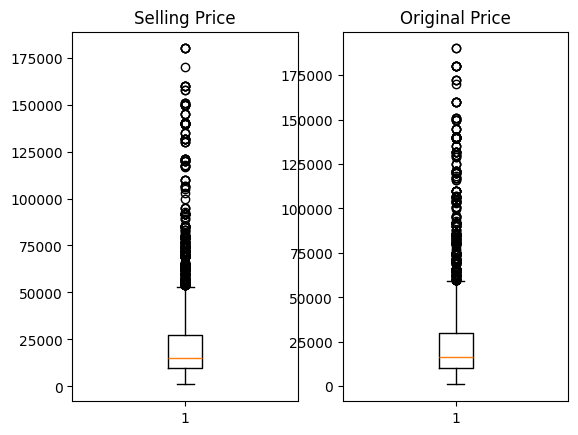

In [8]:
fig , axs = plt.subplots(1,2)
axs[0].boxplot(df['Selling Price'])
axs[0].set_title('Selling Price')
axs[1].boxplot(df['Original Price'])
axs[1].set_title('Original Price')

Text(0.5, 1.0, 'discount percentage')

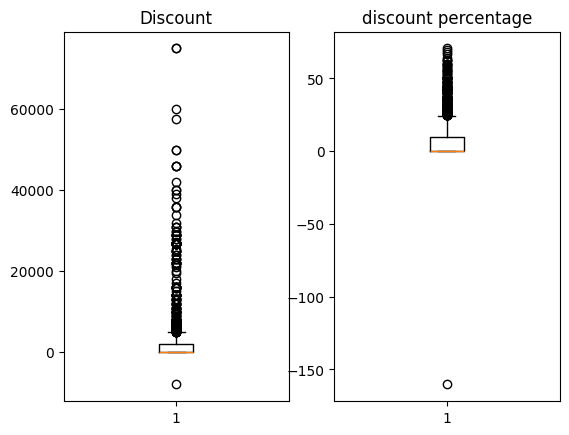

In [9]:
fig , axs = plt.subplots(1,2)
axs[0].boxplot(df['Discount'])
axs[0].set_title('Discount')
axs[1].boxplot(df['discount percentage'])
axs[1].set_title('discount percentage')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2897 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               2897 non-null   object 
 1   Models               2897 non-null   object 
 2   Colors               2897 non-null   object 
 3   Memory               2897 non-null   object 
 4   Storage              2897 non-null   object 
 5   Camera               2897 non-null   object 
 6   Rating               2897 non-null   float64
 7   Selling Price        2897 non-null   int64  
 8   Original Price       2897 non-null   int64  
 9   Mobile               2897 non-null   object 
 10  Discount             2897 non-null   int64  
 11  discount percentage  2897 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 294.2+ KB


In [11]:
df.loc[df['discount percentage'] < 0]

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
2137,OPPO,A5s,Red,2 GB,32 GB,Yes,4.3,12990,4990,OPPO A5s,-8000,-160.320641


In [12]:
df.drop(df['discount percentage'].loc[df['discount percentage'] < 0].index,axis = 0,inplace = True)

In [13]:
df.loc[df['discount percentage'] < 0]

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage


Text(0.5, 1.0, 'discount percentage')

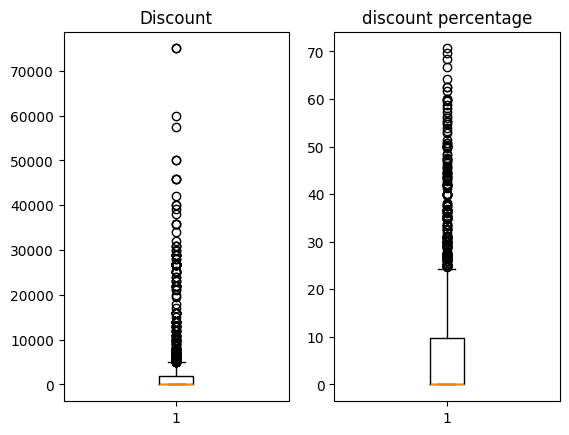

In [14]:
fig , axs = plt.subplots(1,2)
axs[0].boxplot(df['Discount'])
axs[0].set_title('Discount')
axs[1].boxplot(df['discount percentage'])
axs[1].set_title('discount percentage')

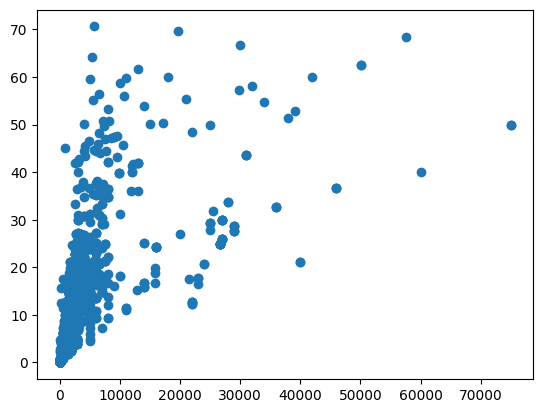

In [15]:
plt.scatter(df['Discount'],df['discount percentage'])

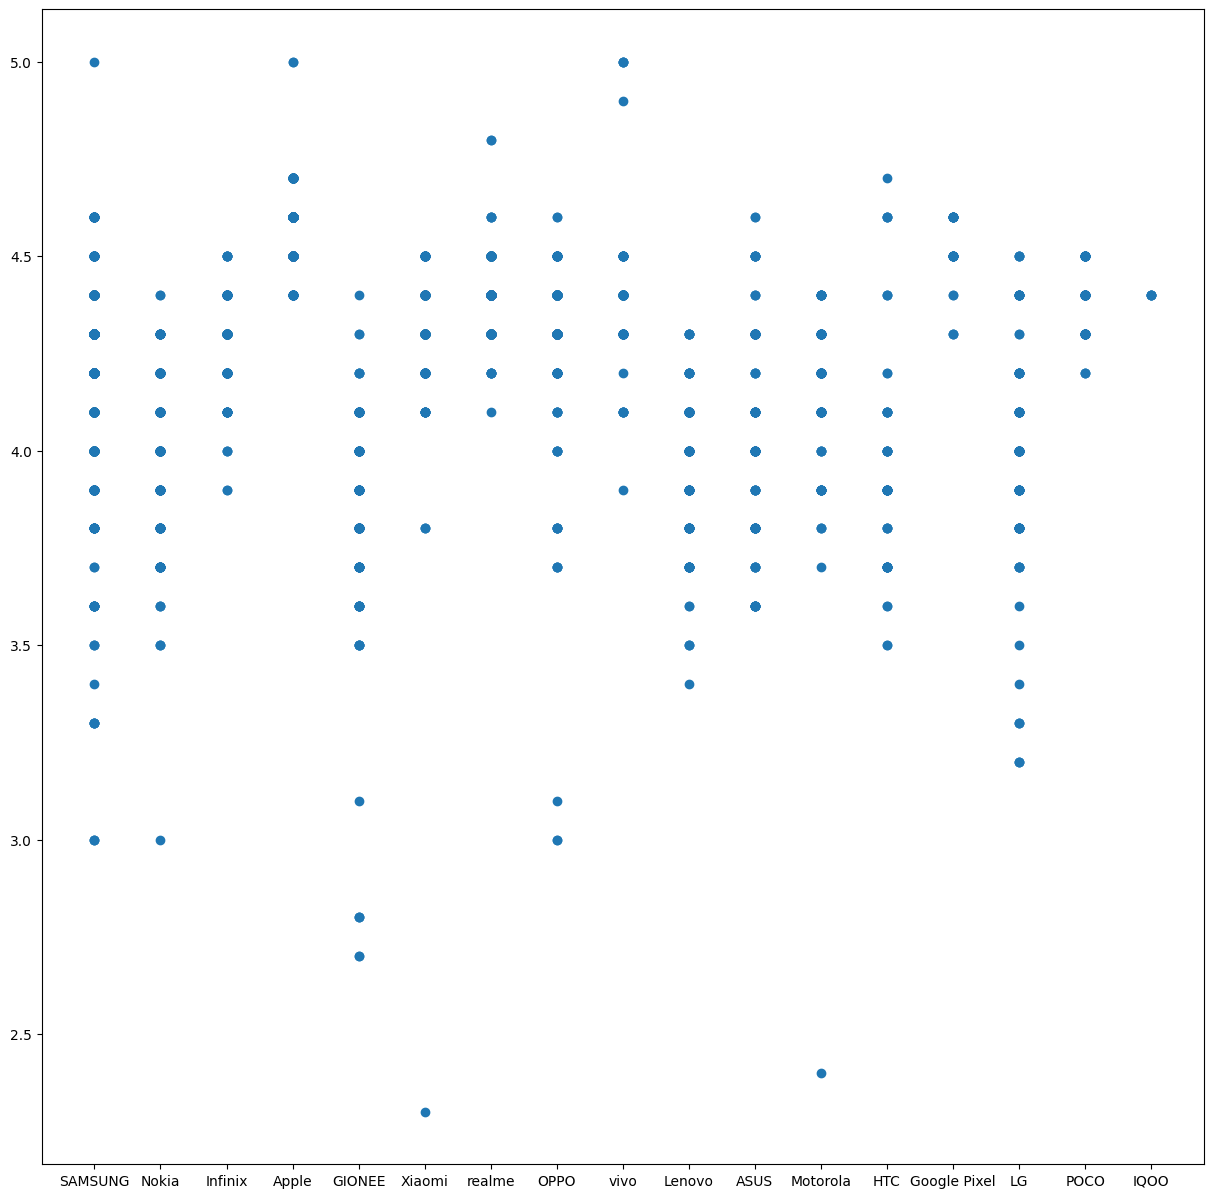

In [16]:
plt.figure(figsize=(15,15))
plt.scatter(df['Brands'],df['Rating'])

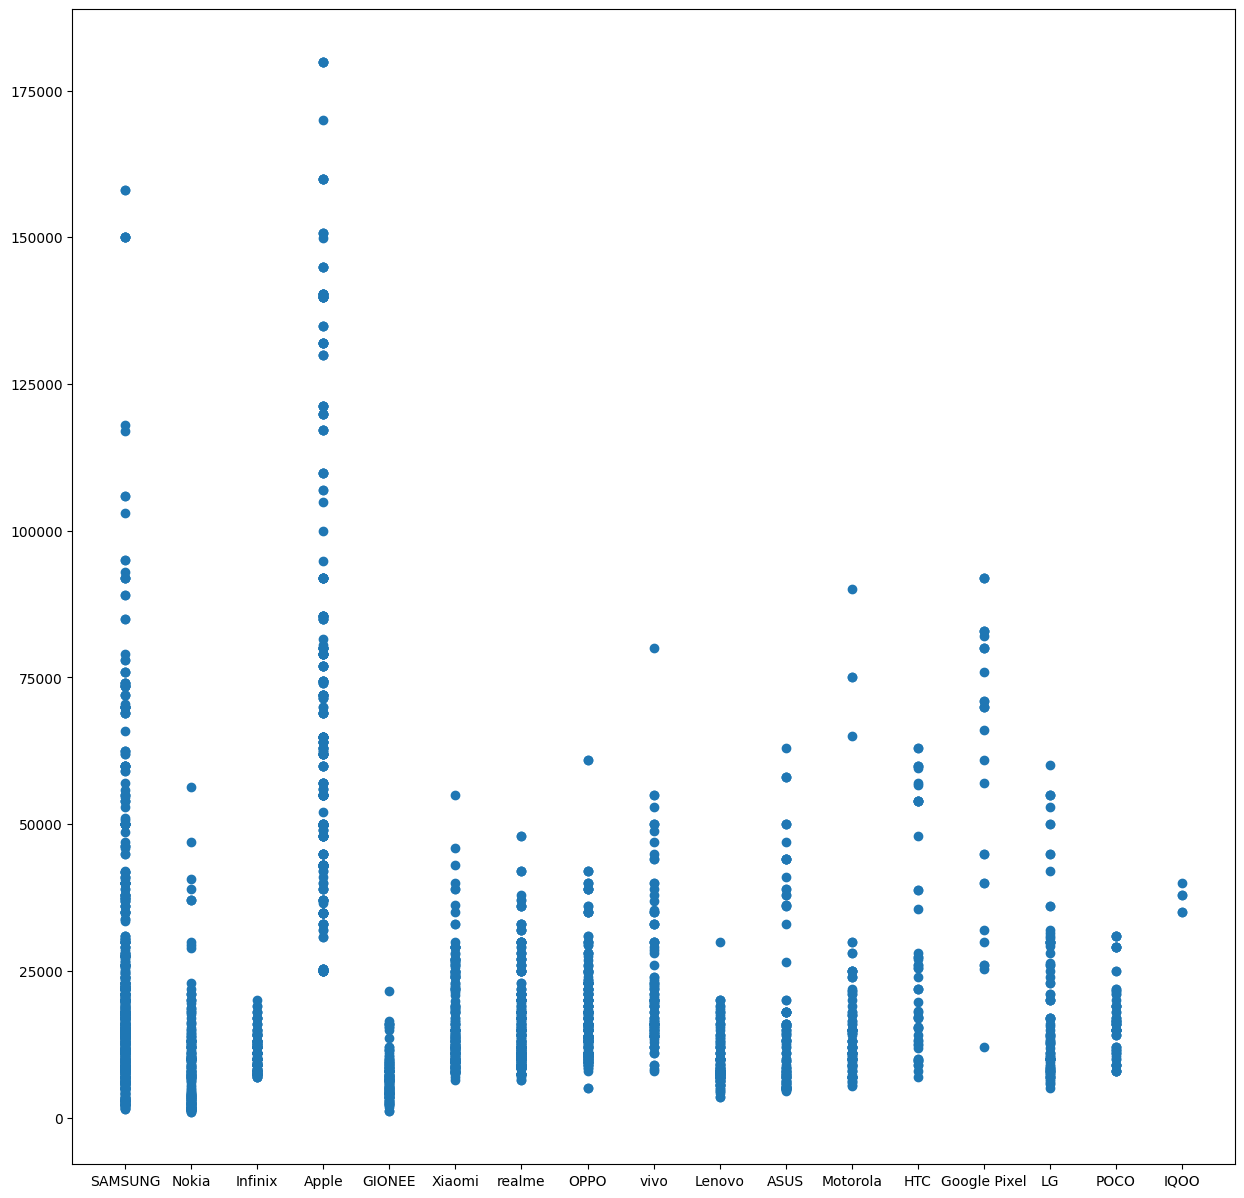

In [17]:
plt.figure(figsize=(15,15))
plt.scatter(df['Brands'],df['Selling Price'])

Text(0, 0.5, 'Discount')

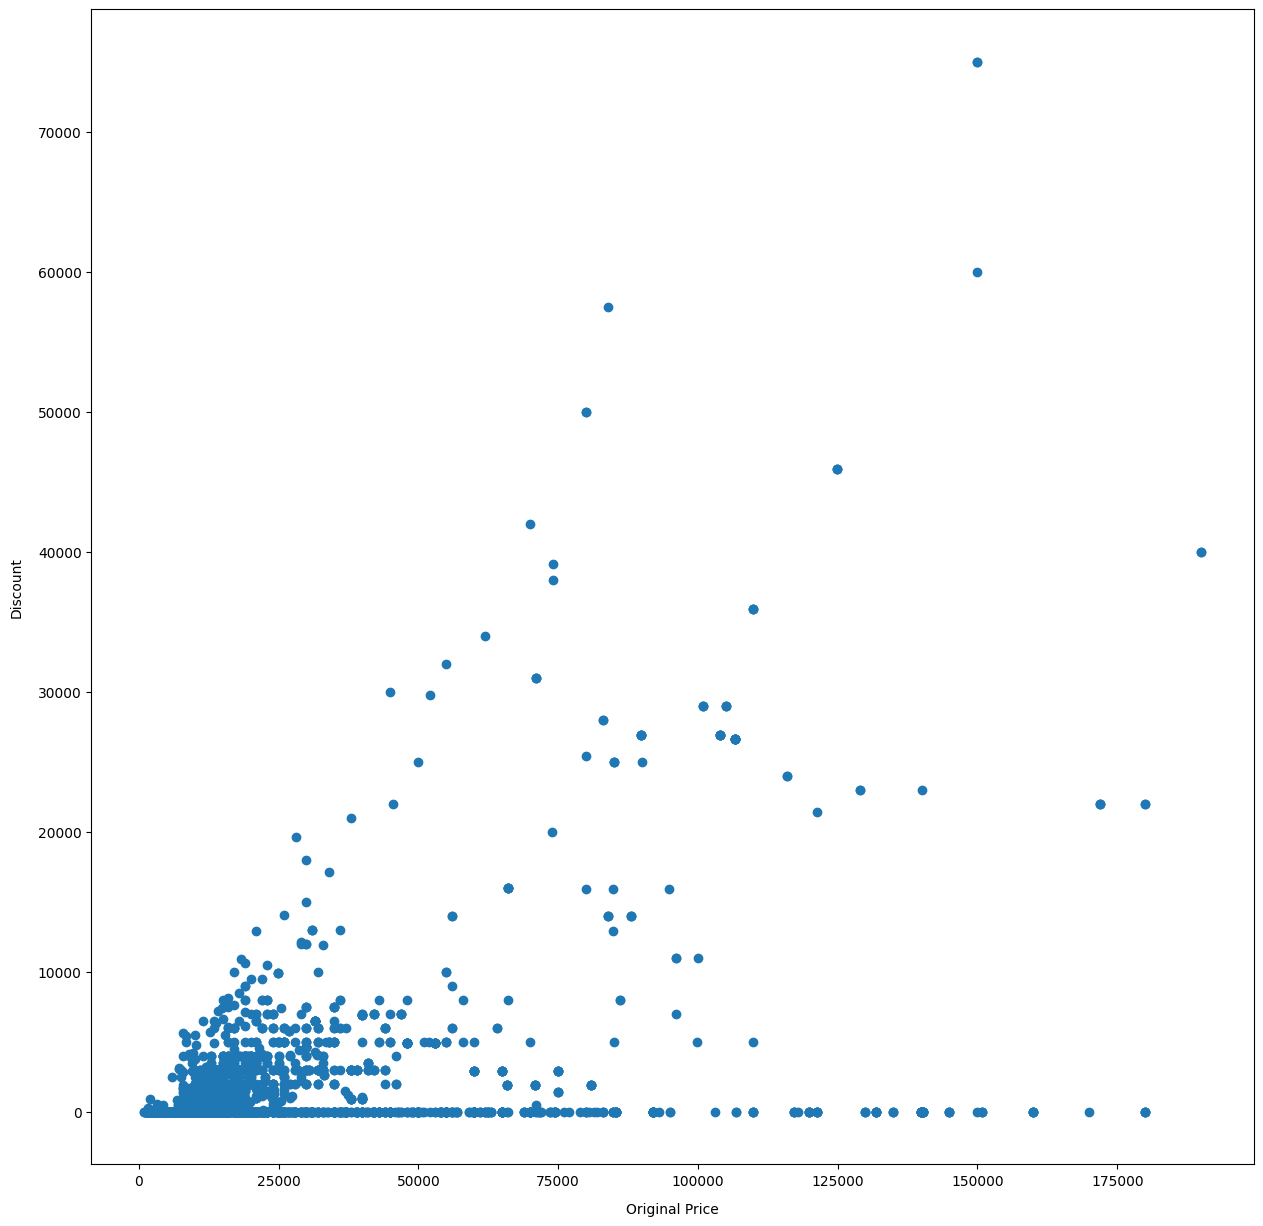

In [18]:
plt.figure(figsize=(15,15))
plt.scatter(df['Original Price'],df['Discount'])
plt.xlabel('Original Price',labelpad=10)
plt.ylabel('Discount',labelpad=10)

In [19]:
df.drop('Mobile',axis = 1,inplace=True)

In [20]:
df

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,0,0.000000
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,0,0.000000
5,GIONEE,L800,Black,8 MB,16 MB,Yes,4.0,2199,2199,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3107,SAMSUNG,Galaxy S Duos 2,Black,512 MB,4 GB,Yes,4.0,5999,5999,0,0.000000
3108,SAMSUNG,Metro 313,Black,4 MB,2 MB,Yes,4.2,2299,2299,0,0.000000
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,3000,15.000750
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,0,0.000000


In [21]:
momery_list = []
for i in df['Memory']:
    momery_list.append(re.sub('[A-Z]','',i)) #'[A-Z]'

In [22]:
momery_list[1]

'2 '

In [23]:
int_memory_list = []

for i in momery_list:
    int_memory_list.append(float(i))

In [24]:
df['Ram'] = int_memory_list

In [25]:
df

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Discount,discount percentage,Ram
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,1669,7.947998,8.0
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,0,0.000000,2.0
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,0,0.000000,4.0
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,0,0.000000,4.0
5,GIONEE,L800,Black,8 MB,16 MB,Yes,4.0,2199,2199,0,0.000000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3107,SAMSUNG,Galaxy S Duos 2,Black,512 MB,4 GB,Yes,4.0,5999,5999,0,0.000000,512.0
3108,SAMSUNG,Metro 313,Black,4 MB,2 MB,Yes,4.2,2299,2299,0,0.000000,4.0
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,3000,15.000750,6.0
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,0,0.000000,2.0


In [26]:
size_memory_list = []

for i in df['Memory']:
    size_memory_list.append(re.sub('[^A-Z]','',i))

In [27]:
df['Ram Unit'] = size_memory_list

In [28]:
df

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Discount,discount percentage,Ram,Ram Unit
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,1669,7.947998,8.0,GB
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,0,0.000000,2.0,GB
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,0,0.000000,4.0,GB
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,0,0.000000,4.0,GB
5,GIONEE,L800,Black,8 MB,16 MB,Yes,4.0,2199,2199,0,0.000000,8.0,MB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,SAMSUNG,Galaxy S Duos 2,Black,512 MB,4 GB,Yes,4.0,5999,5999,0,0.000000,512.0,MB
3108,SAMSUNG,Metro 313,Black,4 MB,2 MB,Yes,4.2,2299,2299,0,0.000000,4.0,MB
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,3000,15.000750,6.0,GB
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,0,0.000000,2.0,GB


In [29]:
df1 = df.copy() # checkpoint

In [30]:
df1.drop('Memory',axis = 1,inplace=True)

In [31]:
df1

,Brands,Models,Colors,Storage,Camera,Rating,Selling Price,Original Price,Discount,discount percentage,Ram,Ram Unit
0,SAMSUNG,GALAXY M31S,Mirage Black,128 GB,Yes,4.3,19330,20999,1669,7.947998,8.0,GB
1,Nokia,3.2,Steel,16 GB,Yes,3.8,10199,10199,0,0.000000,2.0,GB
3,Infinix,Note 5,Ice Blue,64 GB,Yes,4.2,12999,12999,0,0.000000,4.0,GB
4,Apple,iPhone 11,Black,64 GB,Yes,4.6,49900,49900,0,0.000000,4.0,GB
5,GIONEE,L800,Black,16 MB,Yes,4.0,2199,2199,0,0.000000,8.0,MB
...,...,...,...,...,...,...,...,...,...,...,...,...
3107,SAMSUNG,Galaxy S Duos 2,Black,4 GB,Yes,4.0,5999,5999,0,0.000000,512.0,MB
3108,SAMSUNG,Metro 313,Black,2 MB,Yes,4.2,2299,2299,0,0.000000,4.0,MB
3109,POCO,M4 Pro 5G,Cool Blue,128 GB,Yes,4.4,16999,19999,3000,15.000750,6.0,GB
3111,Apple,iPhone SE,White,128 GB,Yes,4.5,44900,44900,0,0.000000,2.0,GB


In [32]:
Storage_list = []

for i in df1['Storage']:
    Storage_list.append(re.sub('[^0-9]','',i))

In [33]:
Storage_list

['128',
 '16',
 '64',
 '64',
 '16',
 '64',
 '16',
 '128',
 '64',
 '256',
 '128',
 '32',
 '128',
 '16',
 '64',
 '32',
 '64',
 '8',
 '128',
 '16',
 '16',
 '64',
 '128',
 '64',
 '32',
 '512',
 '32',
 '64',
 '8',
 '2',
 '8',
 '256',
 '128',
 '16',
 '64',
 '16',
 '128',
 '64',
 '128',
 '32',
 '32',
 '256',
 '64',
 '128',
 '64',
 '32',
 '256',
 '16',
 '128',
 '128',
 '64',
 '4',
 '32',
 '16',
 '32',
 '16',
 '128',
 '32',
 '64',
 '64',
 '64',
 '16',
 '32',
 '128',
 '128',
 '32',
 '128',
 '512',
 '128',
 '128',
 '16',
 '8',
 '64',
 '128',
 '8',
 '128',
 '128',
 '64',
 '32',
 '32',
 '128',
 '128',
 '128',
 '256',
 '256',
 '256',
 '64',
 '32',
 '16',
 '128',
 '256',
 '256',
 '8',
 '64',
 '128',
 '128',
 '4',
 '16',
 '32',
 '64',
 '32',
 '128',
 '128',
 '64',
 '64',
 '4',
 '32',
 '64',
 '256',
 '16',
 '64',
 '64',
 '16',
 '32',
 '32',
 '8',
 '64',
 '16',
 '64',
 '128',
 '32',
 '128',
 '4',
 '64',
 '64',
 '4',
 '32',
 '128',
 '128',
 '256',
 '64',
 '256',
 '64',
 '32',
 '256',
 '64',
 '128',
 '256

In [34]:
storage_list_int = []
for i in Storage_list:
    storage_list_int.append(int(i))

In [35]:
storage_list_int

[128,
 16,
 64,
 64,
 16,
 64,
 16,
 128,
 64,
 256,
 128,
 32,
 128,
 16,
 64,
 32,
 64,
 8,
 128,
 16,
 16,
 64,
 128,
 64,
 32,
 512,
 32,
 64,
 8,
 2,
 8,
 256,
 128,
 16,
 64,
 16,
 128,
 64,
 128,
 32,
 32,
 256,
 64,
 128,
 64,
 32,
 256,
 16,
 128,
 128,
 64,
 4,
 32,
 16,
 32,
 16,
 128,
 32,
 64,
 64,
 64,
 16,
 32,
 128,
 128,
 32,
 128,
 512,
 128,
 128,
 16,
 8,
 64,
 128,
 8,
 128,
 128,
 64,
 32,
 32,
 128,
 128,
 128,
 256,
 256,
 256,
 64,
 32,
 16,
 128,
 256,
 256,
 8,
 64,
 128,
 128,
 4,
 16,
 32,
 64,
 32,
 128,
 128,
 64,
 64,
 4,
 32,
 64,
 256,
 16,
 64,
 64,
 16,
 32,
 32,
 8,
 64,
 16,
 64,
 128,
 32,
 128,
 4,
 64,
 64,
 4,
 32,
 128,
 128,
 256,
 64,
 256,
 64,
 32,
 256,
 64,
 128,
 256,
 128,
 32,
 128,
 128,
 128,
 128,
 32,
 16,
 64,
 128,
 256,
 128,
 16,
 32,
 64,
 256,
 32,
 64,
 128,
 128,
 64,
 64,
 64,
 64,
 256,
 8,
 128,
 64,
 64,
 2,
 64,
 64,
 128,
 128,
 128,
 128,
 32,
 64,
 32,
 16,
 128,
 128,
 16,
 64,
 4,
 64,
 64,
 16,
 64,
 16,
 128,
 

In [36]:
df1['Storage1'] = storage_list_int

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2896 entries, 0 to 3113
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               2896 non-null   object 
 1   Models               2896 non-null   object 
 2   Colors               2896 non-null   object 
 3   Storage              2896 non-null   object 
 4   Camera               2896 non-null   object 
 5   Rating               2896 non-null   float64
 6   Selling Price        2896 non-null   int64  
 7   Original Price       2896 non-null   int64  
 8   Discount             2896 non-null   int64  
 9   discount percentage  2896 non-null   float64
 10  Ram                  2896 non-null   float64
 11  Ram Unit             2896 non-null   object 
 12  Storage1             2896 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 316.8+ KB


In [38]:
Storage_list_unit =[]

for i in df1['Storage']:
    Storage_list_unit.append(re.sub('[^GMB]','',i))

In [39]:
Storage_list_unit

['GB',
 'GB',
 'GB',
 'GB',
 'MB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'MB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',

In [40]:
for i in Storage_list_unit:
    if i == 'B':
        print(i)

B
B
B
B
B
B


In [41]:
df1['Storage Unit'] = Storage_list_unit

In [42]:
df1

,Brands,Models,Colors,Storage,Camera,Rating,Selling Price,Original Price,Discount,discount percentage,Ram,Ram Unit,Storage1,Storage Unit
0,SAMSUNG,GALAXY M31S,Mirage Black,128 GB,Yes,4.3,19330,20999,1669,7.947998,8.0,GB,128,GB
1,Nokia,3.2,Steel,16 GB,Yes,3.8,10199,10199,0,0.000000,2.0,GB,16,GB
3,Infinix,Note 5,Ice Blue,64 GB,Yes,4.2,12999,12999,0,0.000000,4.0,GB,64,GB
4,Apple,iPhone 11,Black,64 GB,Yes,4.6,49900,49900,0,0.000000,4.0,GB,64,GB
5,GIONEE,L800,Black,16 MB,Yes,4.0,2199,2199,0,0.000000,8.0,MB,16,MB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,SAMSUNG,Galaxy S Duos 2,Black,4 GB,Yes,4.0,5999,5999,0,0.000000,512.0,MB,4,GB
3108,SAMSUNG,Metro 313,Black,2 MB,Yes,4.2,2299,2299,0,0.000000,4.0,MB,2,MB
3109,POCO,M4 Pro 5G,Cool Blue,128 GB,Yes,4.4,16999,19999,3000,15.000750,6.0,GB,128,GB
3111,Apple,iPhone SE,White,128 GB,Yes,4.5,44900,44900,0,0.000000,2.0,GB,128,GB


In [43]:
df1.drop('Storage',axis = 1,inplace = True)

In [44]:
df1

,Brands,Models,Colors,Camera,Rating,Selling Price,Original Price,Discount,discount percentage,Ram,Ram Unit,Storage1,Storage Unit
0,SAMSUNG,GALAXY M31S,Mirage Black,Yes,4.3,19330,20999,1669,7.947998,8.0,GB,128,GB
1,Nokia,3.2,Steel,Yes,3.8,10199,10199,0,0.000000,2.0,GB,16,GB
3,Infinix,Note 5,Ice Blue,Yes,4.2,12999,12999,0,0.000000,4.0,GB,64,GB
4,Apple,iPhone 11,Black,Yes,4.6,49900,49900,0,0.000000,4.0,GB,64,GB
5,GIONEE,L800,Black,Yes,4.0,2199,2199,0,0.000000,8.0,MB,16,MB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,SAMSUNG,Galaxy S Duos 2,Black,Yes,4.0,5999,5999,0,0.000000,512.0,MB,4,GB
3108,SAMSUNG,Metro 313,Black,Yes,4.2,2299,2299,0,0.000000,4.0,MB,2,MB
3109,POCO,M4 Pro 5G,Cool Blue,Yes,4.4,16999,19999,3000,15.000750,6.0,GB,128,GB
3111,Apple,iPhone SE,White,Yes,4.5,44900,44900,0,0.000000,2.0,GB,128,GB


In [45]:
df1['Storage'] = df1['Storage1']

In [46]:
df1

,Brands,Models,Colors,Camera,Rating,Selling Price,Original Price,Discount,discount percentage,Ram,Ram Unit,Storage1,Storage Unit,Storage
0,SAMSUNG,GALAXY M31S,Mirage Black,Yes,4.3,19330,20999,1669,7.947998,8.0,GB,128,GB,128
1,Nokia,3.2,Steel,Yes,3.8,10199,10199,0,0.000000,2.0,GB,16,GB,16
3,Infinix,Note 5,Ice Blue,Yes,4.2,12999,12999,0,0.000000,4.0,GB,64,GB,64
4,Apple,iPhone 11,Black,Yes,4.6,49900,49900,0,0.000000,4.0,GB,64,GB,64
5,GIONEE,L800,Black,Yes,4.0,2199,2199,0,0.000000,8.0,MB,16,MB,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,SAMSUNG,Galaxy S Duos 2,Black,Yes,4.0,5999,5999,0,0.000000,512.0,MB,4,GB,4
3108,SAMSUNG,Metro 313,Black,Yes,4.2,2299,2299,0,0.000000,4.0,MB,2,MB,2
3109,POCO,M4 Pro 5G,Cool Blue,Yes,4.4,16999,19999,3000,15.000750,6.0,GB,128,GB,128
3111,Apple,iPhone SE,White,Yes,4.5,44900,44900,0,0.000000,2.0,GB,128,GB,128


In [47]:
df1.drop('Storage1',axis = 1,inplace= True)

In [48]:
df1.columns.values

array(['Brands', 'Models', 'Colors', 'Camera', 'Rating', 'Selling Price',
       'Original Price', 'Discount', 'discount percentage', 'Ram',
       'Ram Unit', 'Storage Unit', 'Storage'], dtype=object)

In [49]:
list_index = ['Brands', 'Models', 'Colors', 'Camera','Ram',
       'Ram Unit', 'Storage','Storage Unit','Rating', 'Selling Price',
       'Original Price', 'Discount', 'discount percentage']

In [50]:
df2 = df1[list_index] #checkpoint

In [51]:
df2

,Brands,Models,Colors,Camera,Ram,Ram Unit,Storage,Storage Unit,Rating,Selling Price,Original Price,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,Yes,8.0,GB,128,GB,4.3,19330,20999,1669,7.947998
1,Nokia,3.2,Steel,Yes,2.0,GB,16,GB,3.8,10199,10199,0,0.000000
3,Infinix,Note 5,Ice Blue,Yes,4.0,GB,64,GB,4.2,12999,12999,0,0.000000
4,Apple,iPhone 11,Black,Yes,4.0,GB,64,GB,4.6,49900,49900,0,0.000000
5,GIONEE,L800,Black,Yes,8.0,MB,16,MB,4.0,2199,2199,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,SAMSUNG,Galaxy S Duos 2,Black,Yes,512.0,MB,4,GB,4.0,5999,5999,0,0.000000
3108,SAMSUNG,Metro 313,Black,Yes,4.0,MB,2,MB,4.2,2299,2299,0,0.000000
3109,POCO,M4 Pro 5G,Cool Blue,Yes,6.0,GB,128,GB,4.4,16999,19999,3000,15.000750
3111,Apple,iPhone SE,White,Yes,2.0,GB,128,GB,4.5,44900,44900,0,0.000000


df2.to_csv('Smartphones Sales Dataset Clean.csv',index = False)

In [52]:
df2['Storage Unit'].unique()

array(['GB', 'MB', 'B'], dtype=object)

In [53]:
df3 = df2.drop(df2.loc[df2['Storage Unit'] == 'B'].index ,axis=0)

In [62]:
df3.to_csv('Smartphones Sales Dataset v2.csv',index=False)